In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [59]:
dim = 5
x = tf.placeholder(tf.float32, [None, dim + 1])
w = tf.Variable(tf.zeros([dim+1,1]))
y = tf.matmul(x,w)
t = tf.placeholder(tf.float32, [None, 1])

In [60]:
loss = tf.reduce_sum(tf.square(y - t))

In [62]:
train_step = tf.train.AdamOptimizer().minimize(loss)

In [63]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4,25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12,1])
train_x = np.zeros([12, dim+1])
for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0, dim+1)):
        train_x[row][col] = month**n
train_x = np.array(list(map(int, train_x.reshape(12 * (dim+1))))).reshape(12, (dim+1))
train_x

array([[     1,      1,      1,      1,      1,      1],
       [     1,      2,      4,      8,     16,     32],
       [     1,      3,      9,     27,     81,    243],
       [     1,      4,     16,     64,    256,   1024],
       [     1,      5,     25,    125,    625,   3125],
       [     1,      6,     36,    216,   1296,   7776],
       [     1,      7,     49,    343,   2401,  16807],
       [     1,      8,     64,    512,   4096,  32768],
       [     1,      9,     81,    729,   6561,  59049],
       [     1,     10,    100,   1000,  10000, 100000],
       [     1,     11,    121,   1331,  14641, 161051],
       [     1,     12,    144,   1728,  20736, 248832]])

In [64]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x: train_x, t: train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x: train_x, t: train_t})
        print('Step: %d, Loss: %f' % (i, loss_val))

Step: 10000, Loss: 148.166351
Step: 20000, Loss: 15.954622
Step: 30000, Loss: 22.393147
Step: 40000, Loss: 14.940109
Step: 50000, Loss: 19.477217
Step: 60000, Loss: 14.174248
Step: 70000, Loss: 16.246559
Step: 80000, Loss: 13.714673
Step: 90000, Loss: 13.171707
Step: 100000, Loss: 12.882786


In [65]:
w_val = sess.run(w)
w_val

array([[  2.71743512e+00],
       [  5.46409070e-01],
       [  4.07744259e-01],
       [  1.37235641e-01],
       [ -2.87472513e-02],
       [  1.19350769e-03]], dtype=float32)

In [66]:
def predict(x):
    result = 0.0
    for n in range(0,dim+1):
        result += w_val[n][0] * x ** n
    return result

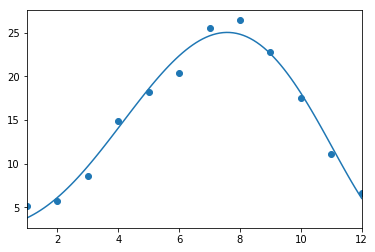

In [67]:
%matplotlib inline
fig = plt.figure()
subplot=fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex, liney)